<h2>AVOCADO PRICE PREDICTION MACHINE LEARNING MODEL</h2>

In [324]:
import numpy as np
import pandas as pd

In [325]:
import matplotlib.pyplot as plt
%matplotlib inline

In [326]:
import seaborn as sns

In [327]:
#IMPORTING THE DATASET

In [328]:
df = pd.read_csv('avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [329]:
#In this notebook we will try to predict the price of the avocado based on various features

In [330]:
#Exploratory data analysis

In [331]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [332]:
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [333]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [334]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


<Axes: ylabel='Frequency'>

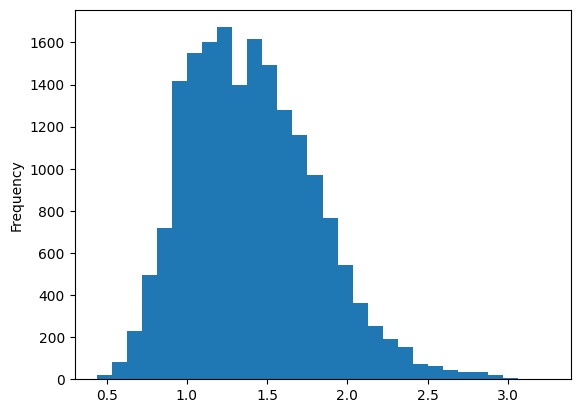

In [335]:
df['AveragePrice'].plot.hist(bins=30)

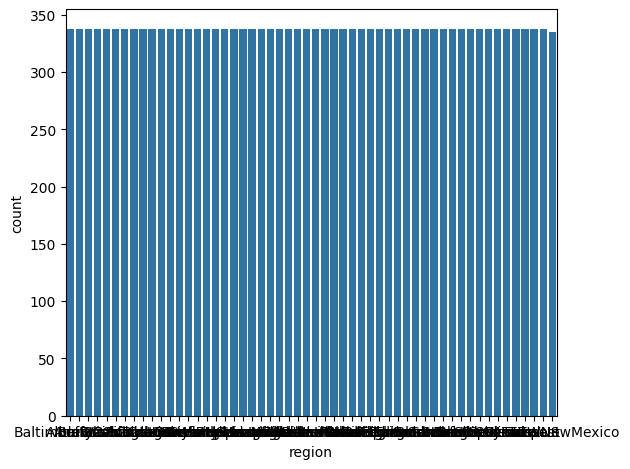

In [336]:
sns.countplot(data=df, x='region')
plt.tight_layout()

In [337]:
df['region'].value_counts()

region
Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago              

In [338]:
df['region'].nunique()

54

In [339]:
#There are almost 338 entries of every region and there are 54 such regions

<Axes: xlabel='type', ylabel='count'>

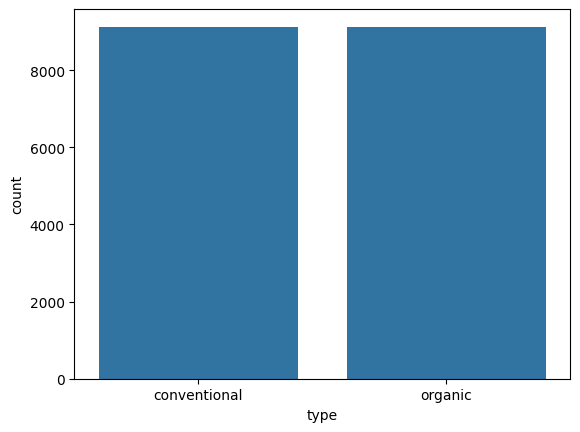

In [340]:
sns.countplot(data=df, x='type')

In [341]:
df['type'].value_counts()

type
conventional    9126
organic         9123
Name: count, dtype: int64

In [342]:
#There are two types of avocado conventional and organic having almost similar number of samples

<Axes: xlabel='Total Volume', ylabel='AveragePrice'>

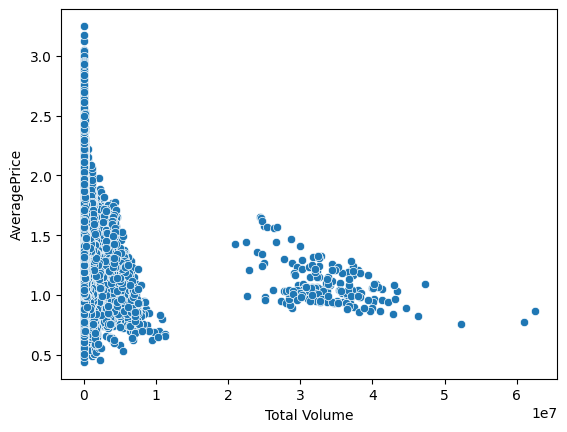

In [343]:
sns.scatterplot(data=df, x='Total Volume', y='AveragePrice')

<Axes: xlabel='Total Volume', ylabel='AveragePrice'>

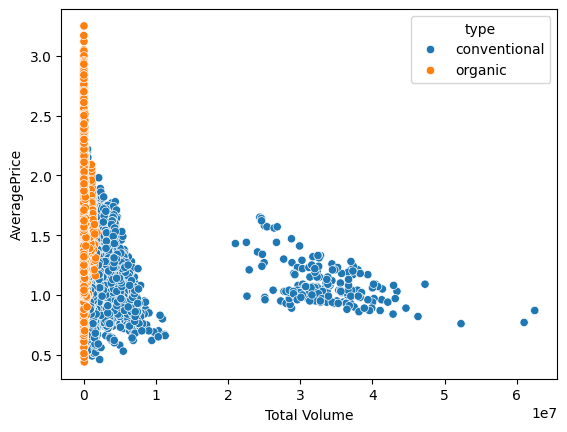

In [344]:
sns.scatterplot(data=df, x='Total Volume', y='AveragePrice', hue='type')

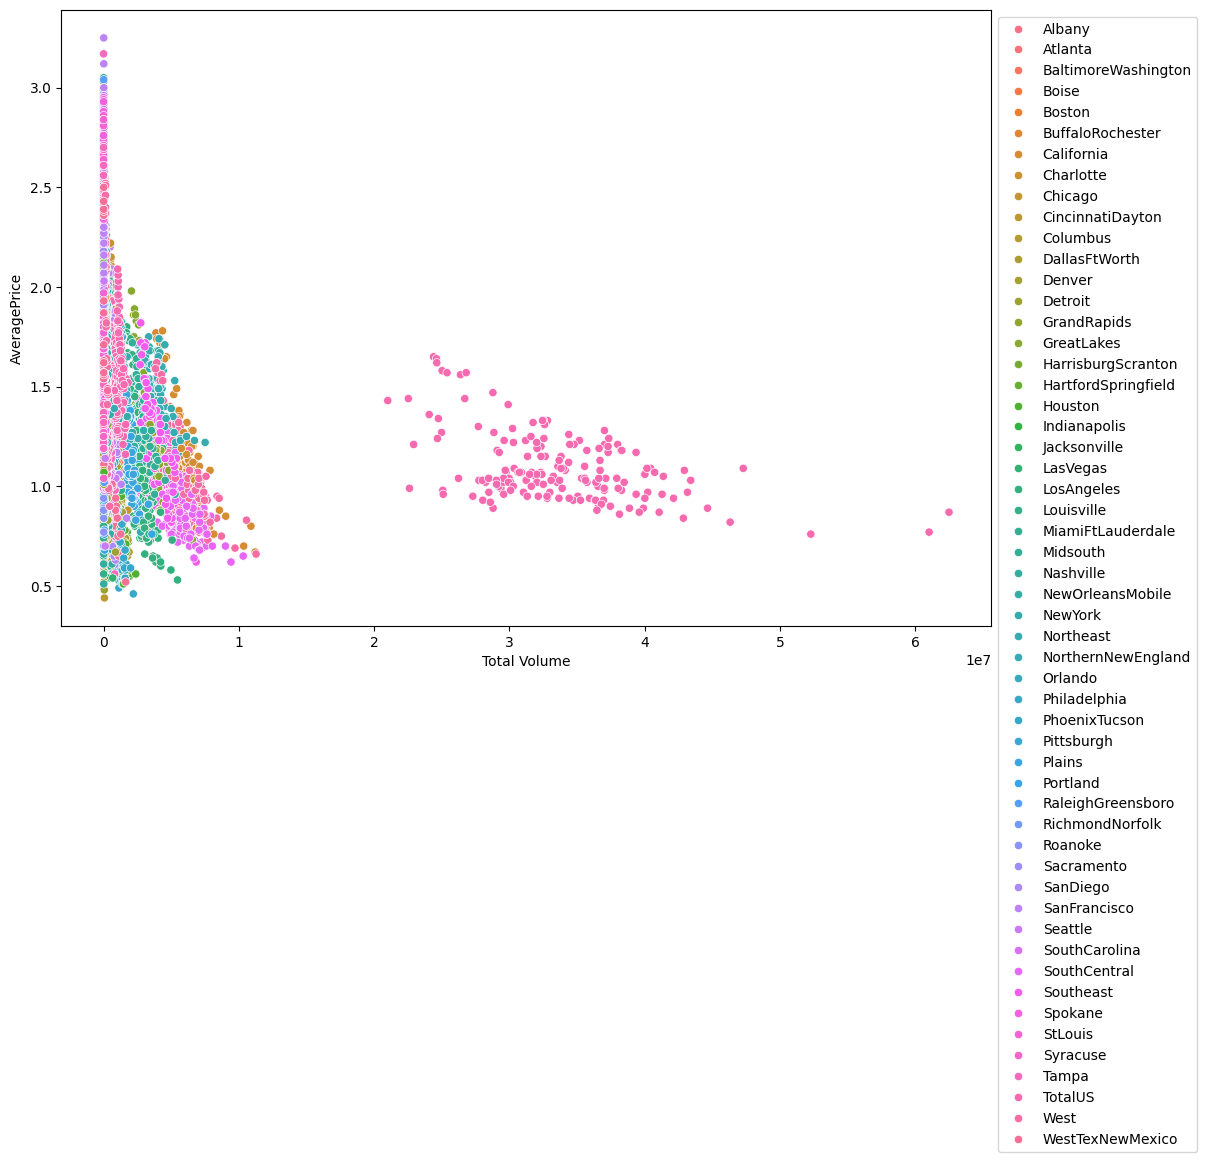

In [345]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='Total Volume', y='AveragePrice', hue='region')
plt.legend(bbox_to_anchor=[1,1])

<Axes: xlabel='Total Volume', ylabel='AveragePrice'>

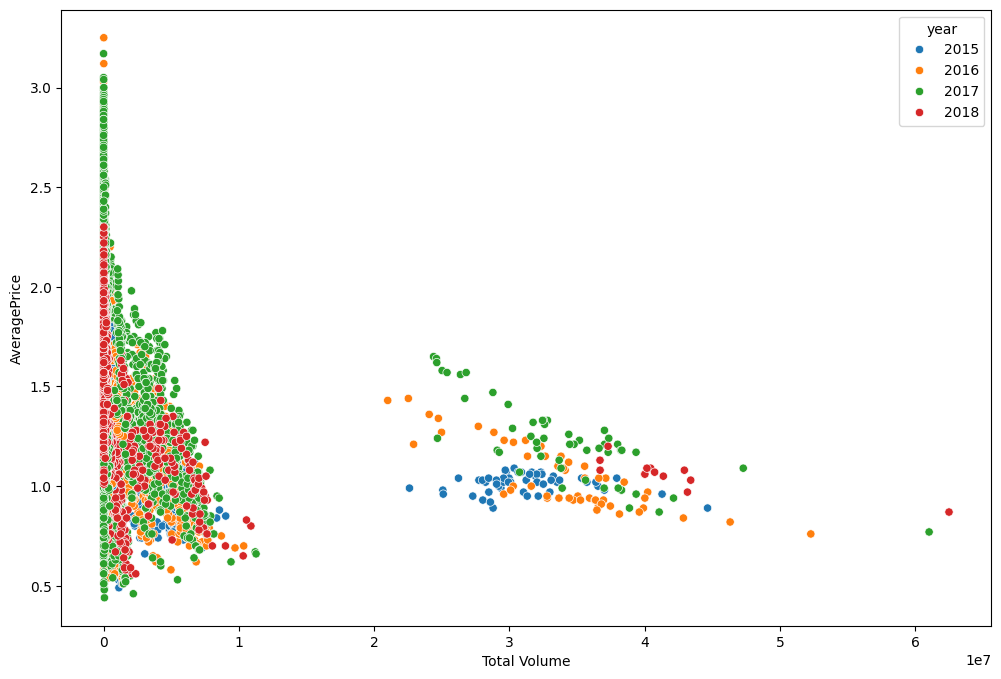

In [346]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='Total Volume', y='AveragePrice', hue='year',palette='tab10')

In [347]:
#DATA PREPROCESSING

In [348]:
#We will drop Unnamed: 0 column as it is only index values 

In [349]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [350]:
#Now we will convert date column from object type to datetime format

In [351]:
df['Date'] = df['Date'].astype('datetime64[ns]')
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [352]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 1.8+ MB


In [353]:
#Now we will create two new columns from date column containing month and day values and year is already a column

In [354]:
df['Month'] = df['Date'].apply(lambda x: x.month)
df['Day'] = df['Date'].apply(lambda x: x.day)
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2,4
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1,28
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1,21
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1,14


In [355]:
#DATA VISUALIZATION

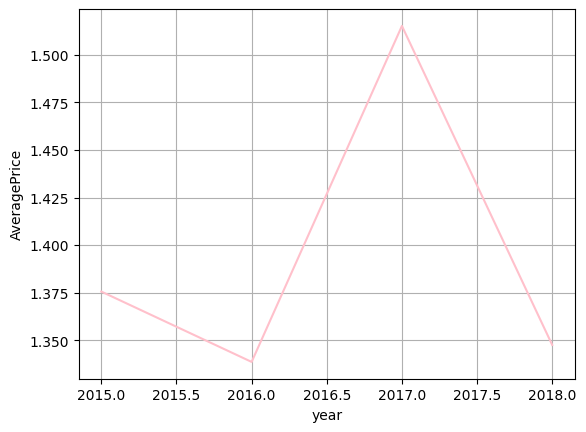

In [356]:
sns.lineplot(data=df, x='year', y='AveragePrice', color='pink', ci=None)
plt.grid()

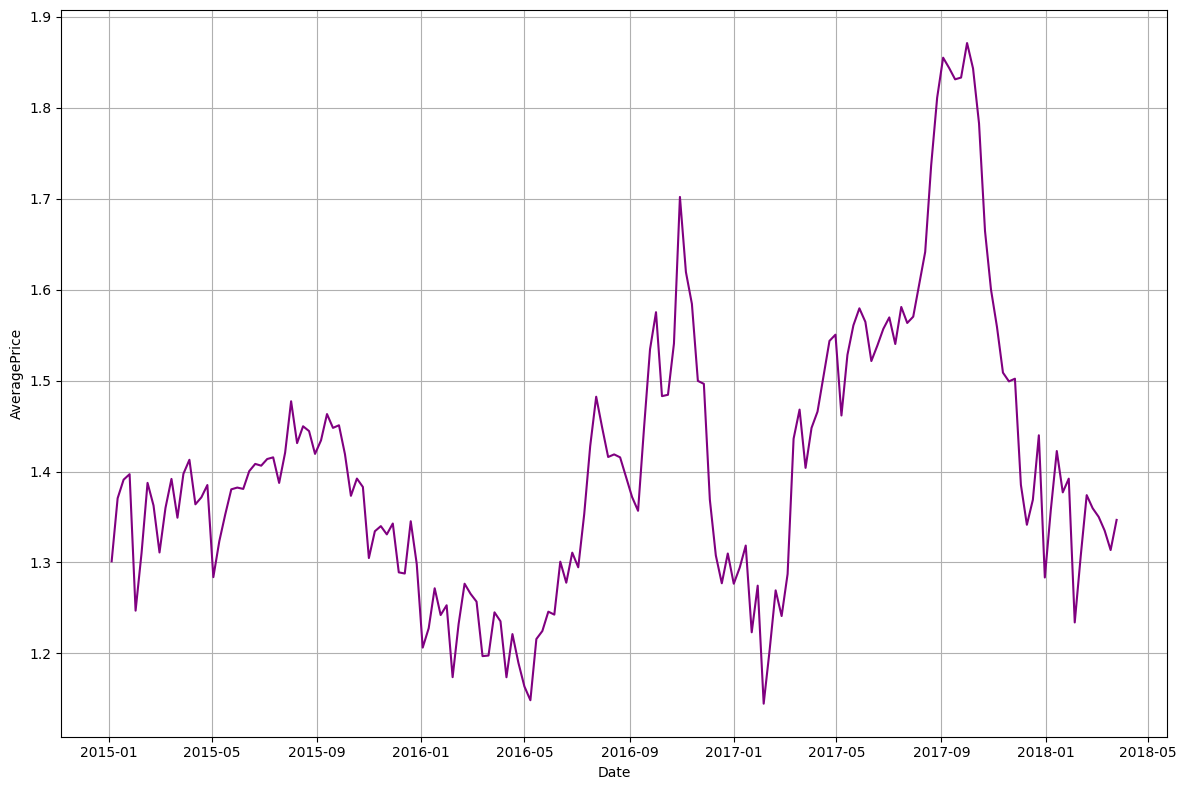

In [357]:
plt.figure(figsize=(12,8))
sns.lineplot(data=df, x='Date', y='AveragePrice', color='purple', errorbar=None)
plt.grid()
plt.tight_layout()

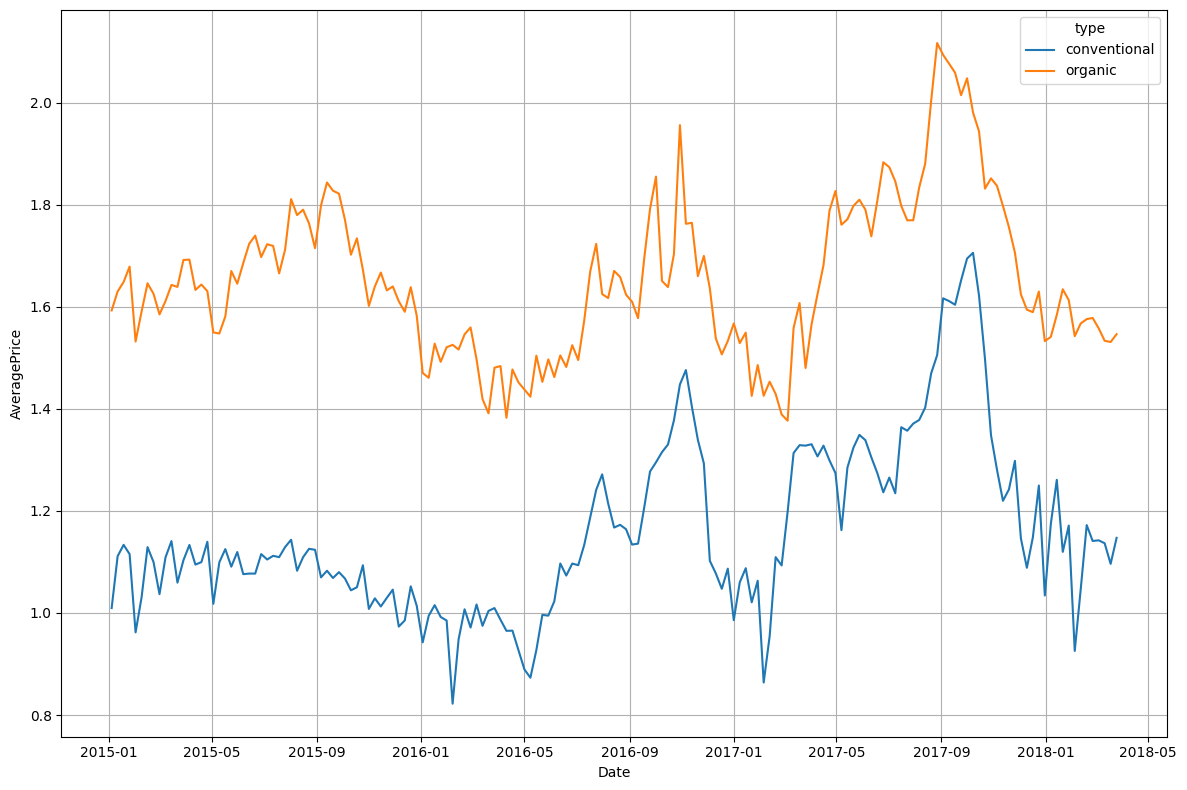

In [358]:
plt.figure(figsize=(12,8))
sns.lineplot(data=df, x='Date', y='AveragePrice', hue='type', errorbar=None)
plt.grid()
plt.tight_layout()

In [359]:
#From the lineplot graph it is clear that the price of avocado skyrockets in the month of September

<Axes: xlabel='year', ylabel='AveragePrice'>

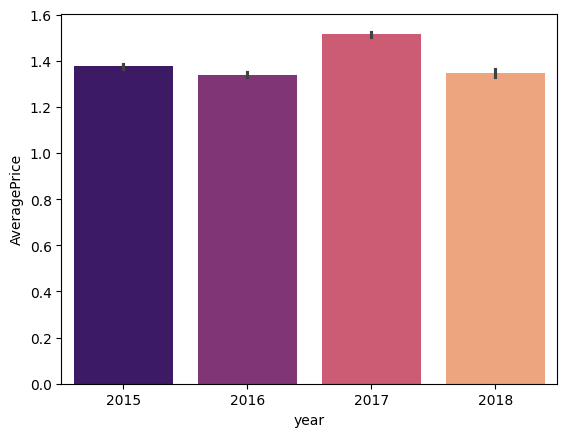

In [360]:
sns.barplot(data=df, x='year', y='AveragePrice', palette='magma')

<Axes: xlabel='Month', ylabel='AveragePrice'>

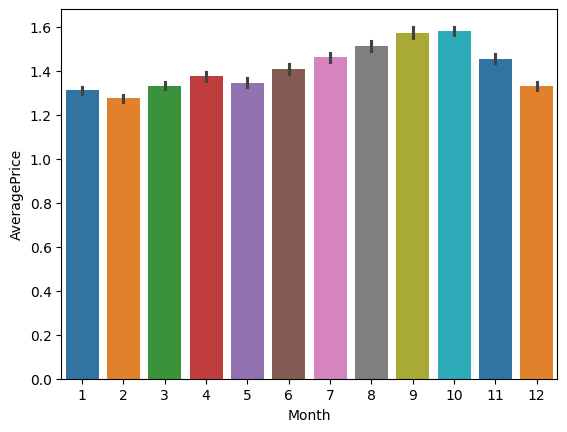

In [361]:
sns.barplot(data=df, x='Month', y='AveragePrice', palette='tab10')

<h3>Above barplots give us average price in a particular year and months</h3>

In [362]:
#Now lets plot histogram of all columns

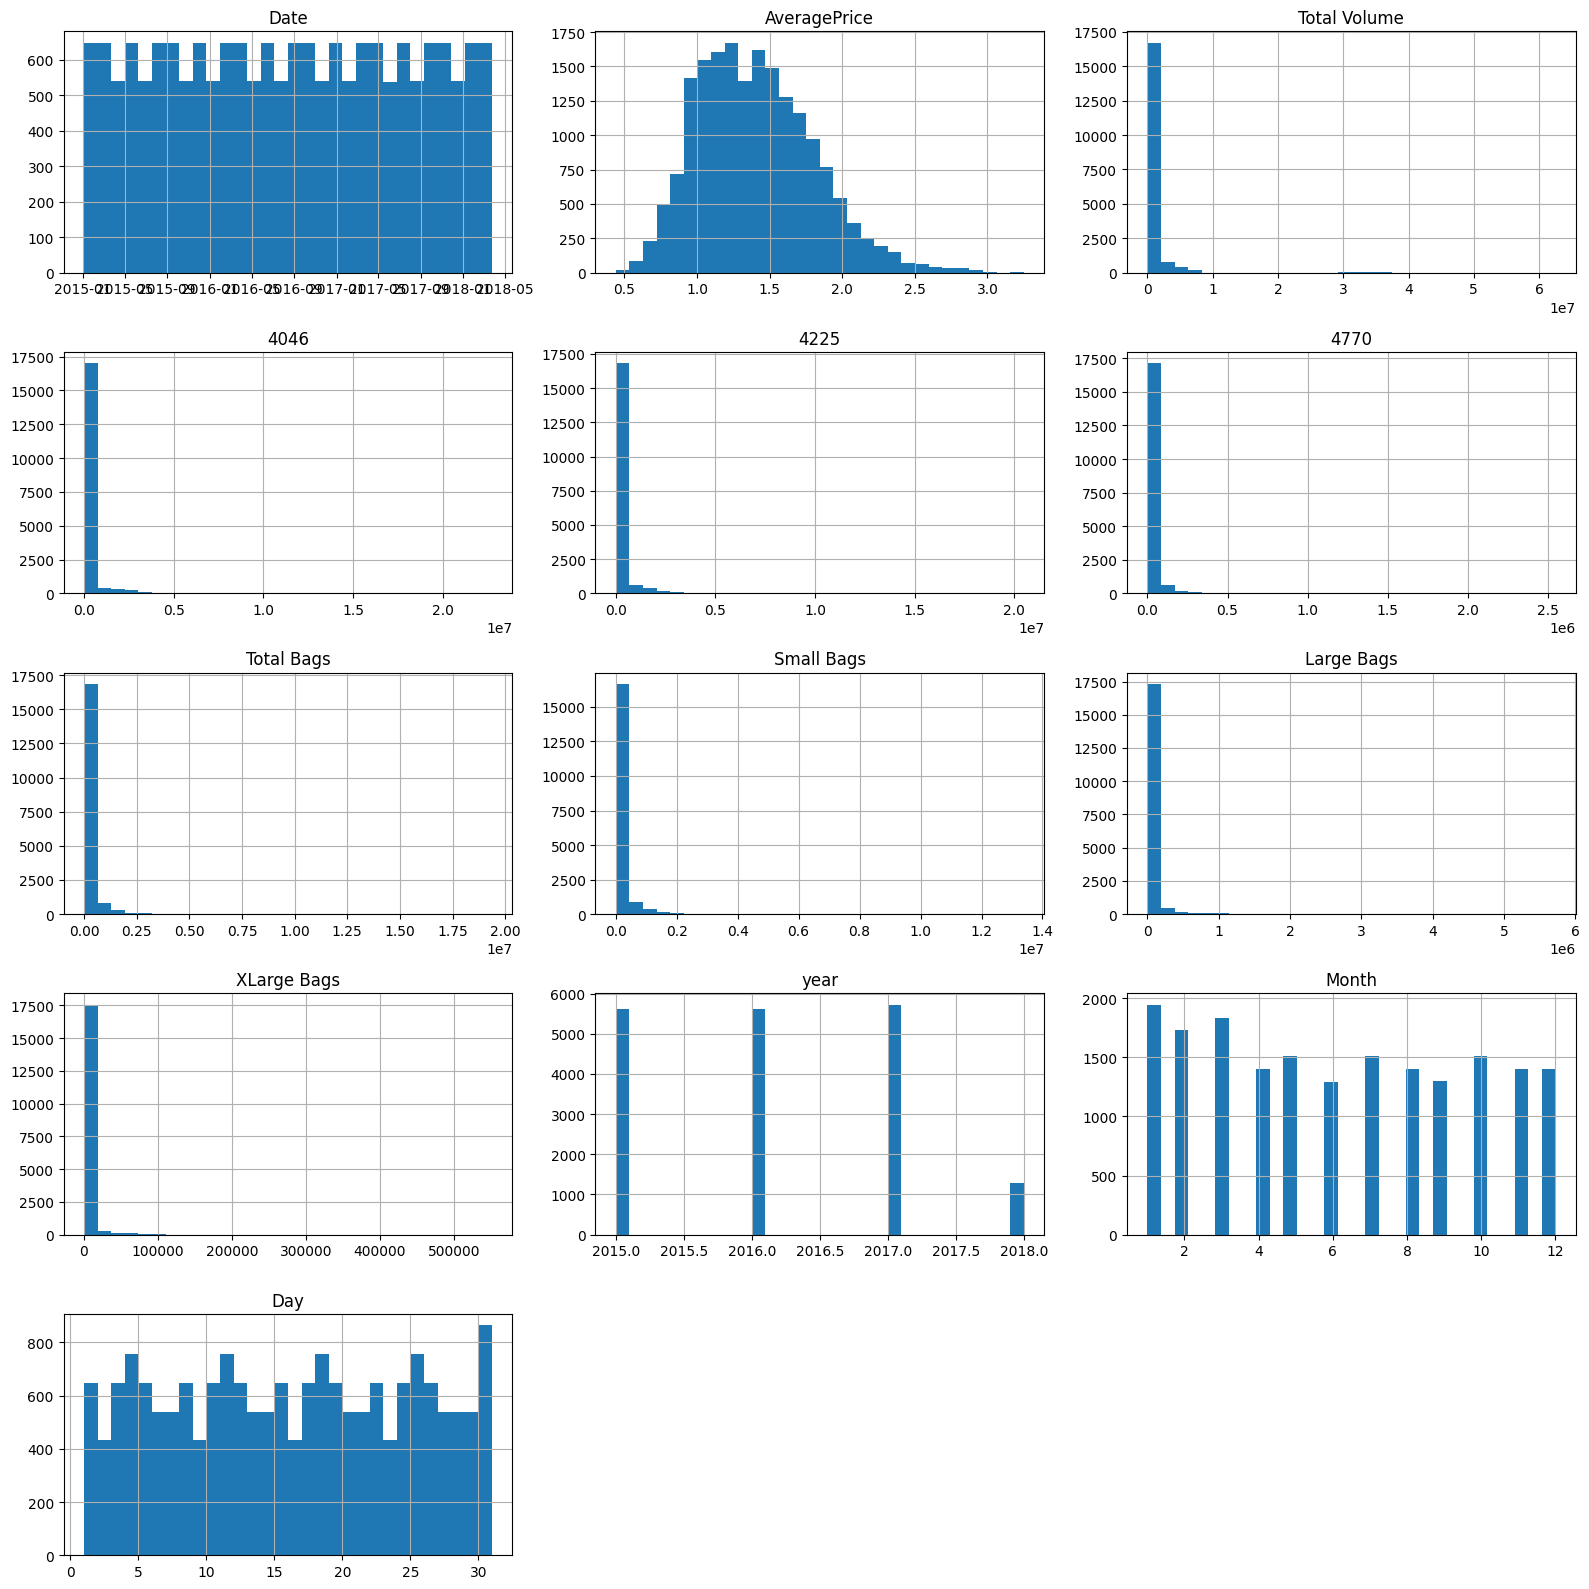

In [363]:
df.hist(figsize=(16,16), layout=(5,3), bins=30)
plt.tight_layout()

<h3>Now, let's plot kdeplot to get a proper view of the distribution of data</h3>

In [364]:
df_num = df.drop(['Date','type','region'], axis=1)
df_num

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,1,14


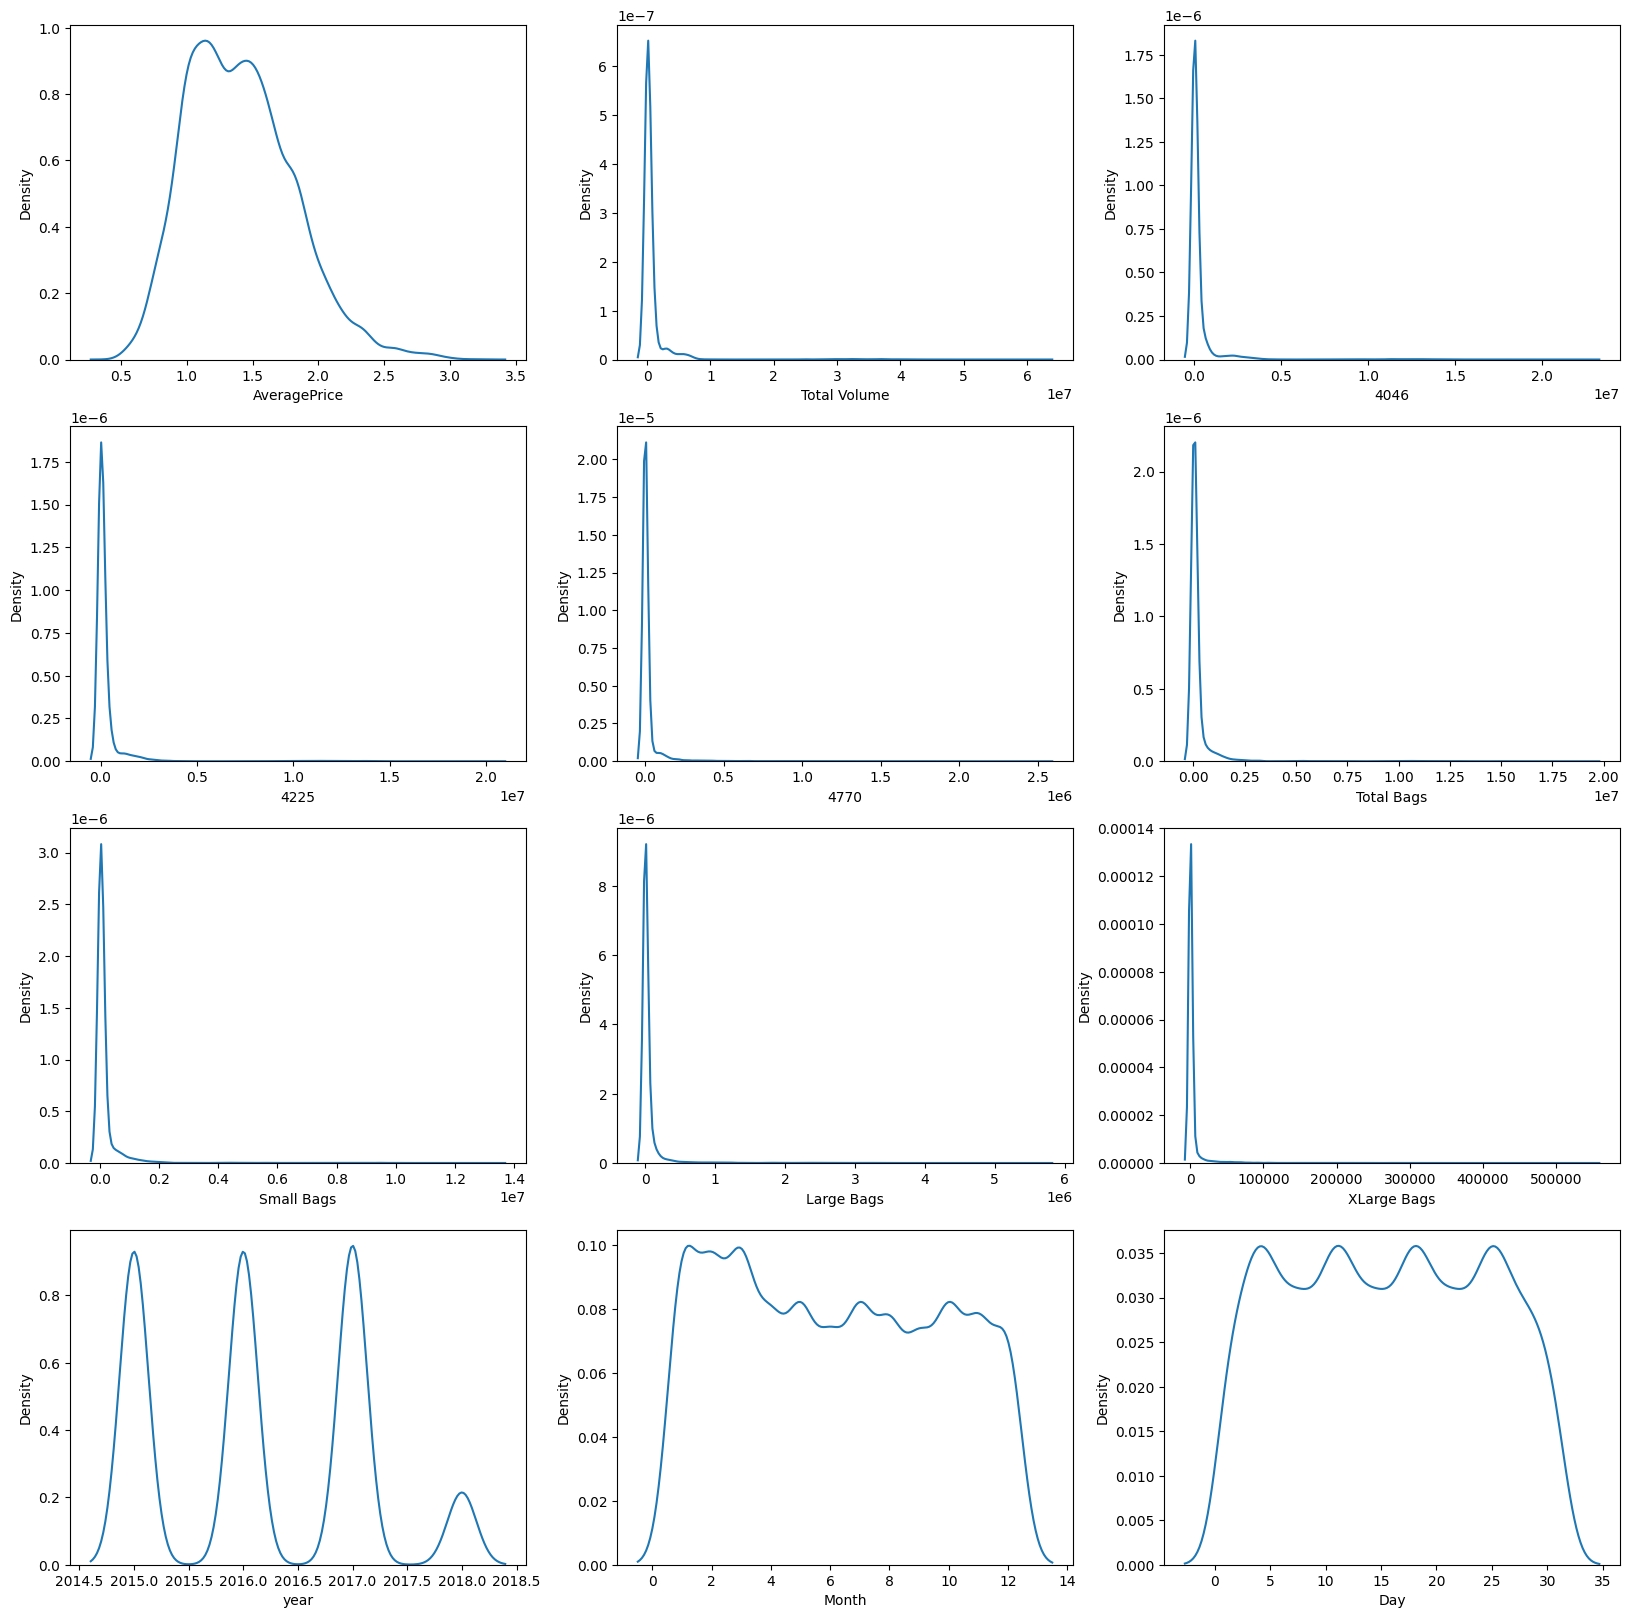

In [365]:
import warnings
warnings.filterwarnings(action='ignore')
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20,20))
plotnumber = 1
for x in df_num:
    ax = plt.subplot(4,3,plotnumber)
    sns.kdeplot(data=df_num, x=x)
    plotnumber += 1


<h3>Now we will check for outliers present if any using the seaborn boxplot function</h3>

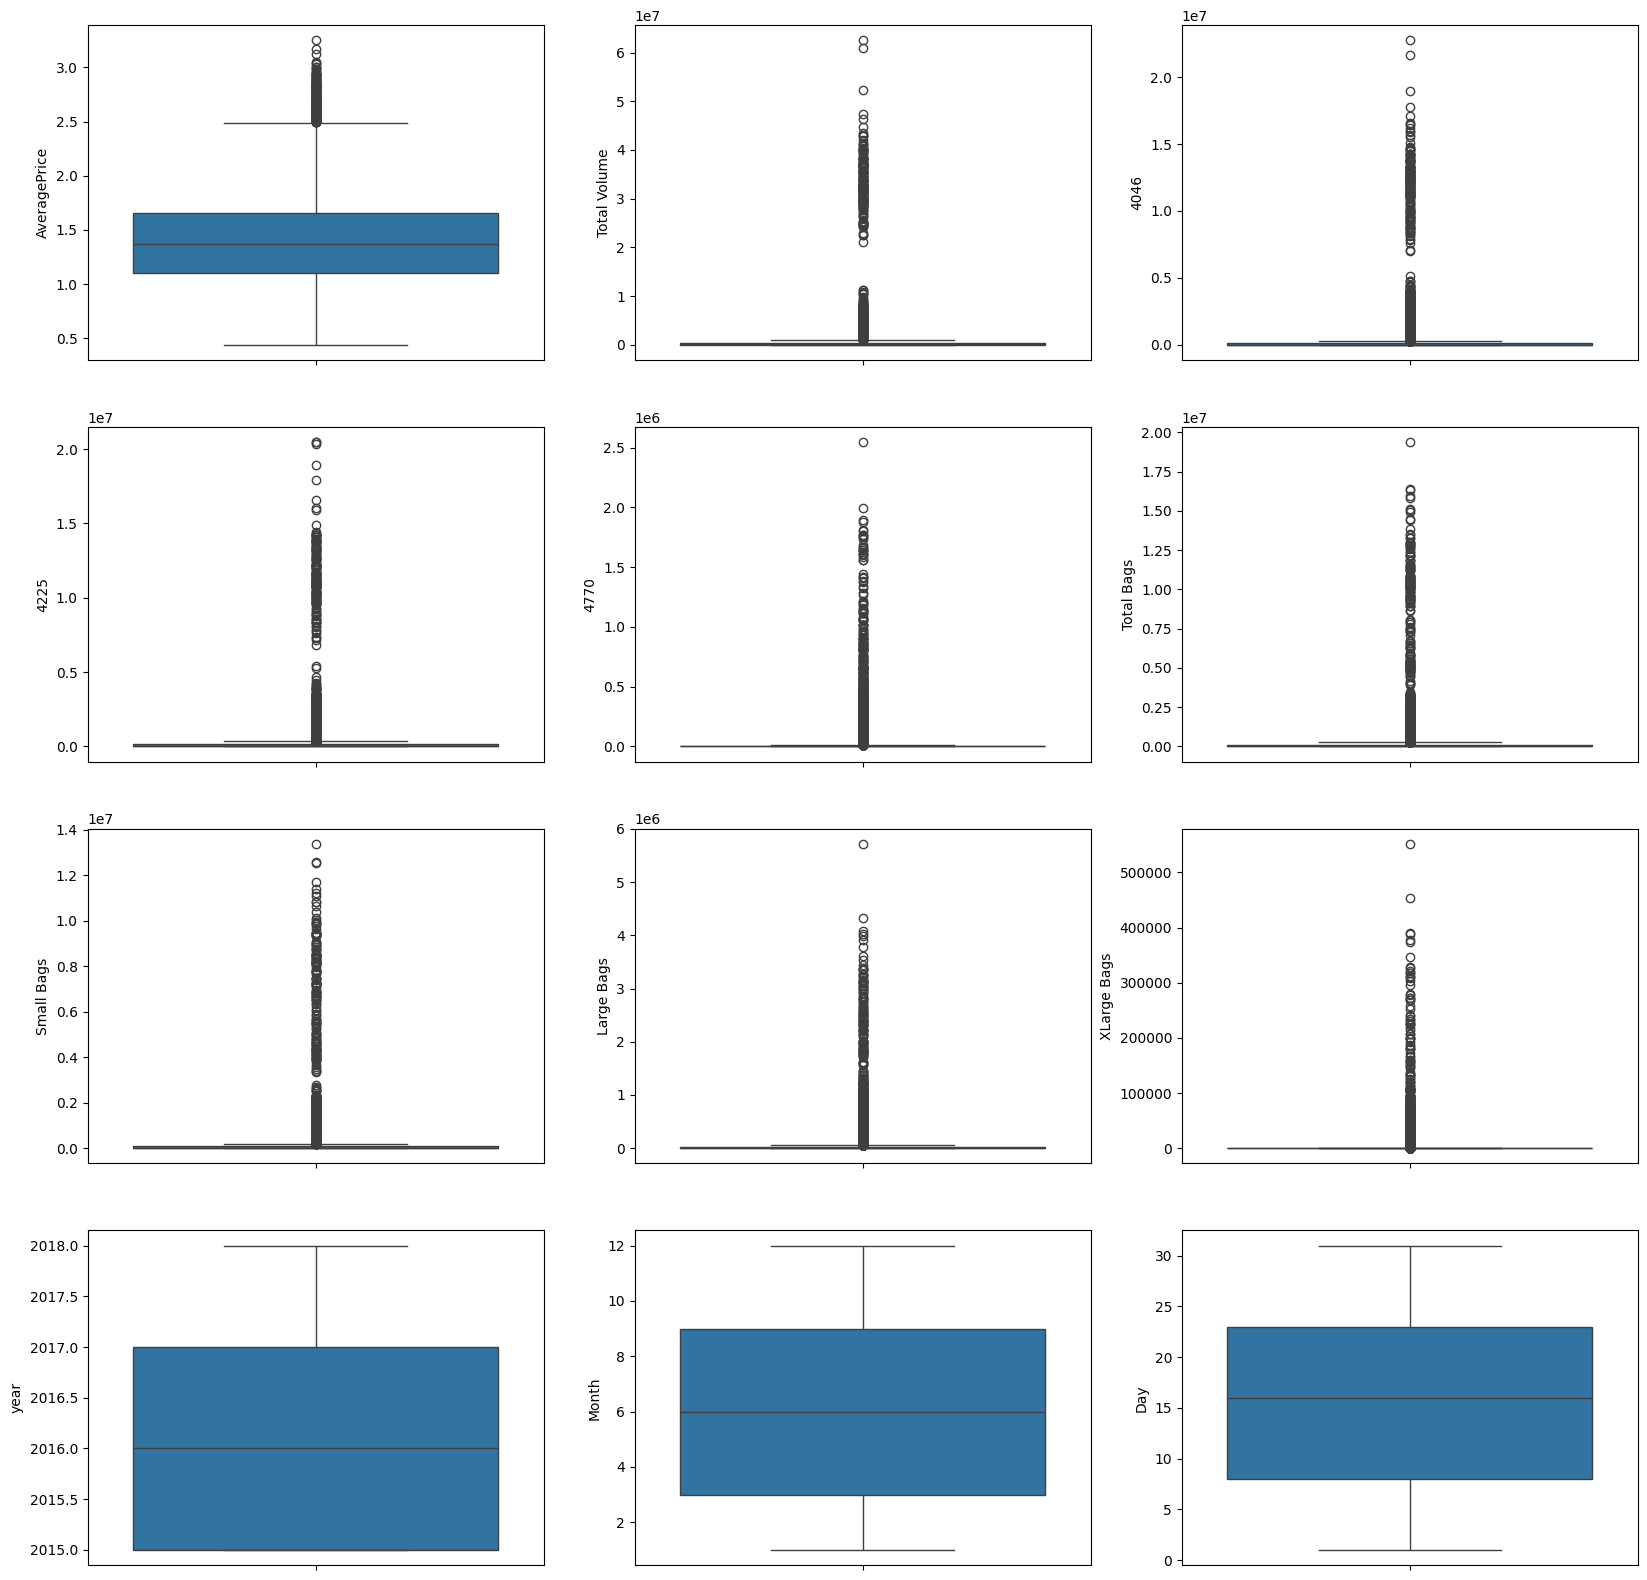

In [366]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20,20))
plotnumber = 1
for x in df_num:
    ax = plt.subplot(4,3,plotnumber)
    sns.boxplot(data=df_num, y=x)
    plotnumber += 1


In [367]:
#There are outliers present but we will not drop them as it will destroy the dataset

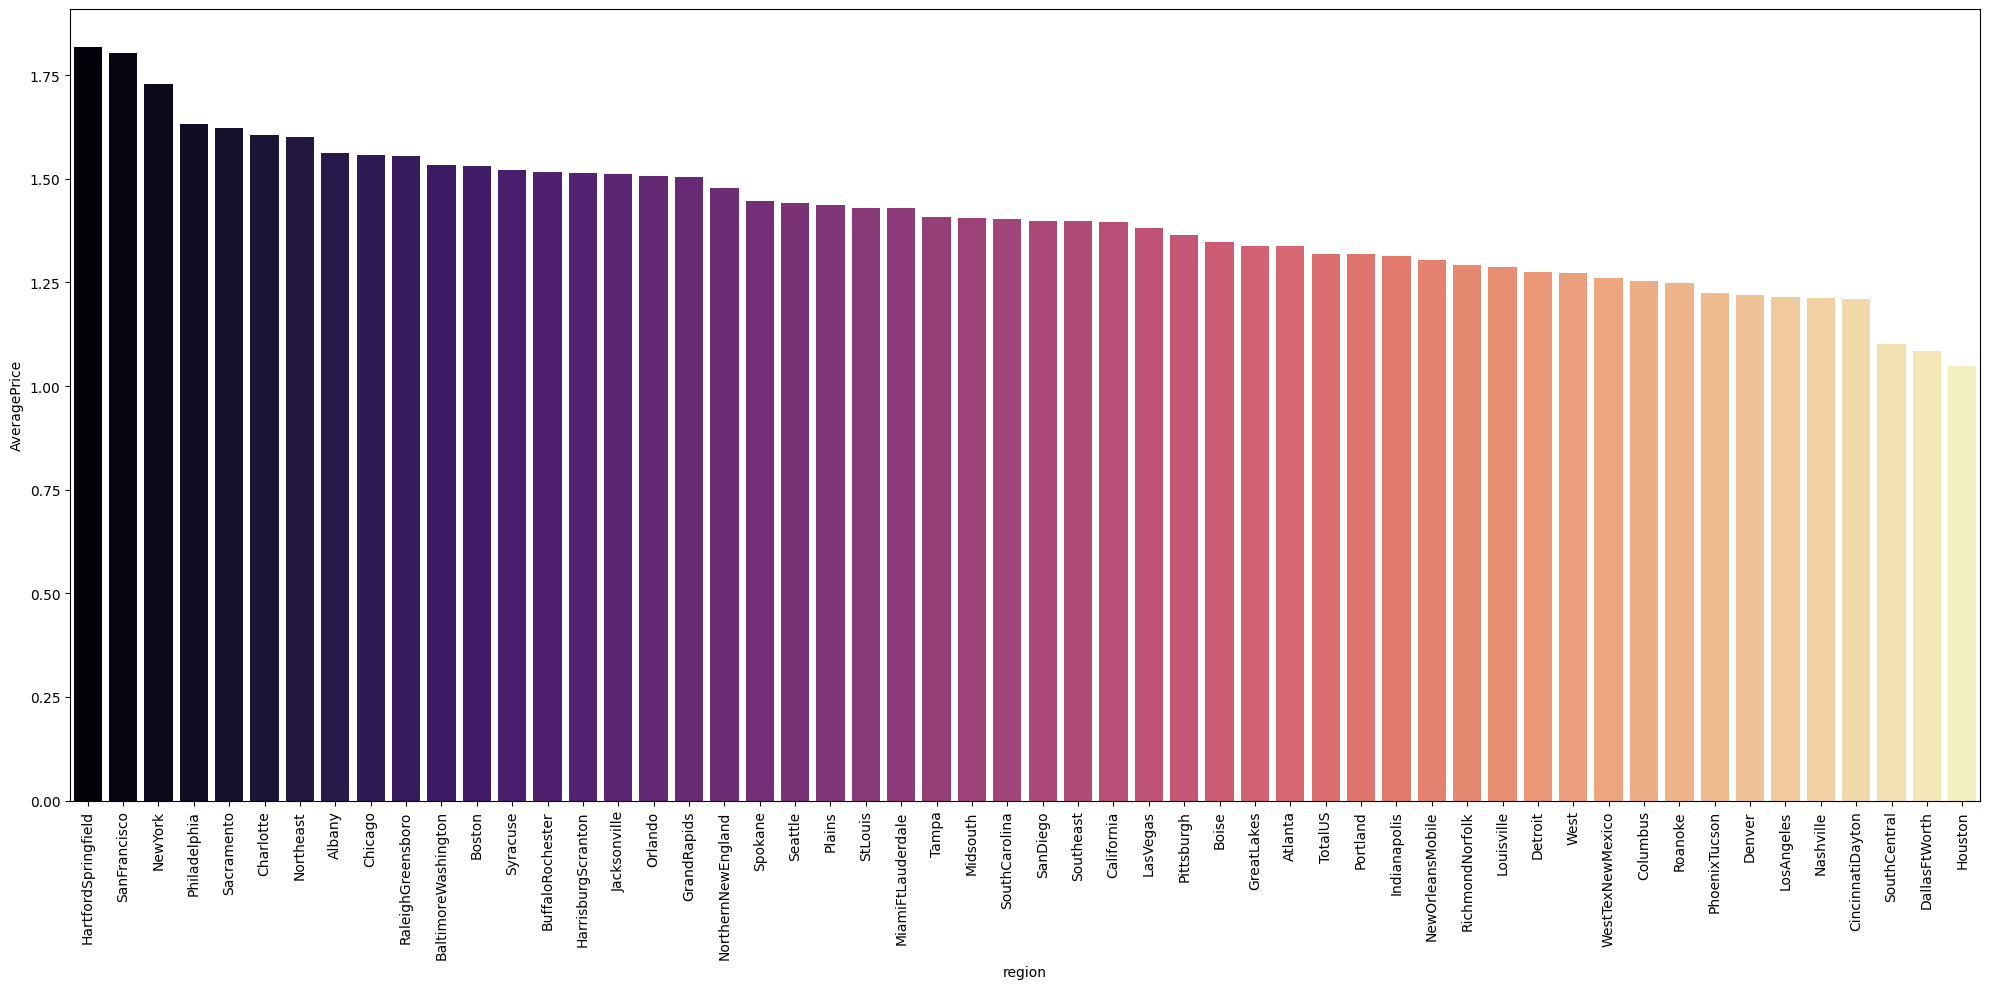

In [368]:
avocado_season = df.groupby(by='region')['AveragePrice'].mean()
avocado_season
plt.figure(figsize=(20,10))
sns.barplot(data=avocado_season.sort_values(ascending=False), palette='magma')
plt.xticks(rotation=90)
plt.tight_layout()

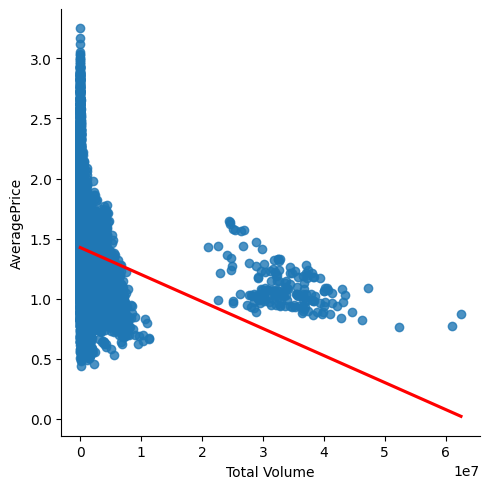

In [369]:
sns.lmplot(data=df, x='Total Volume', y='AveragePrice',ci=None, line_kws={'color':'red'})

<h3>We will check which regions have the highest average volume i.e regions which consume more avocado</h3>

In [370]:
df.groupby(by='region')['Total Volume'].mean()

region
Albany                 4.753787e+04
Atlanta                2.621453e+05
BaltimoreWashington    3.985619e+05
Boise                  4.264257e+04
Boston                 2.877929e+05
BuffaloRochester       6.793630e+04
California             3.044324e+06
Charlotte              1.051939e+05
Chicago                3.955690e+05
CincinnatiDayton       1.317219e+05
Columbus               8.873776e+04
DallasFtWorth          6.166251e+05
Denver                 4.109542e+05
Detroit                1.876403e+05
GrandRapids            8.938383e+04
GreatLakes             1.744505e+06
HarrisburgScranton     1.236948e+05
HartfordSpringfield    1.499128e+05
Houston                6.010884e+05
Indianapolis           8.953666e+04
Jacksonville           8.517753e+04
LasVegas               1.608784e+05
LosAngeles             1.502653e+06
Louisville             4.762427e+04
MiamiFtLauderdale      2.889740e+05
Midsouth               1.503992e+06
Nashville              1.053612e+05
NewOrleansMobile     

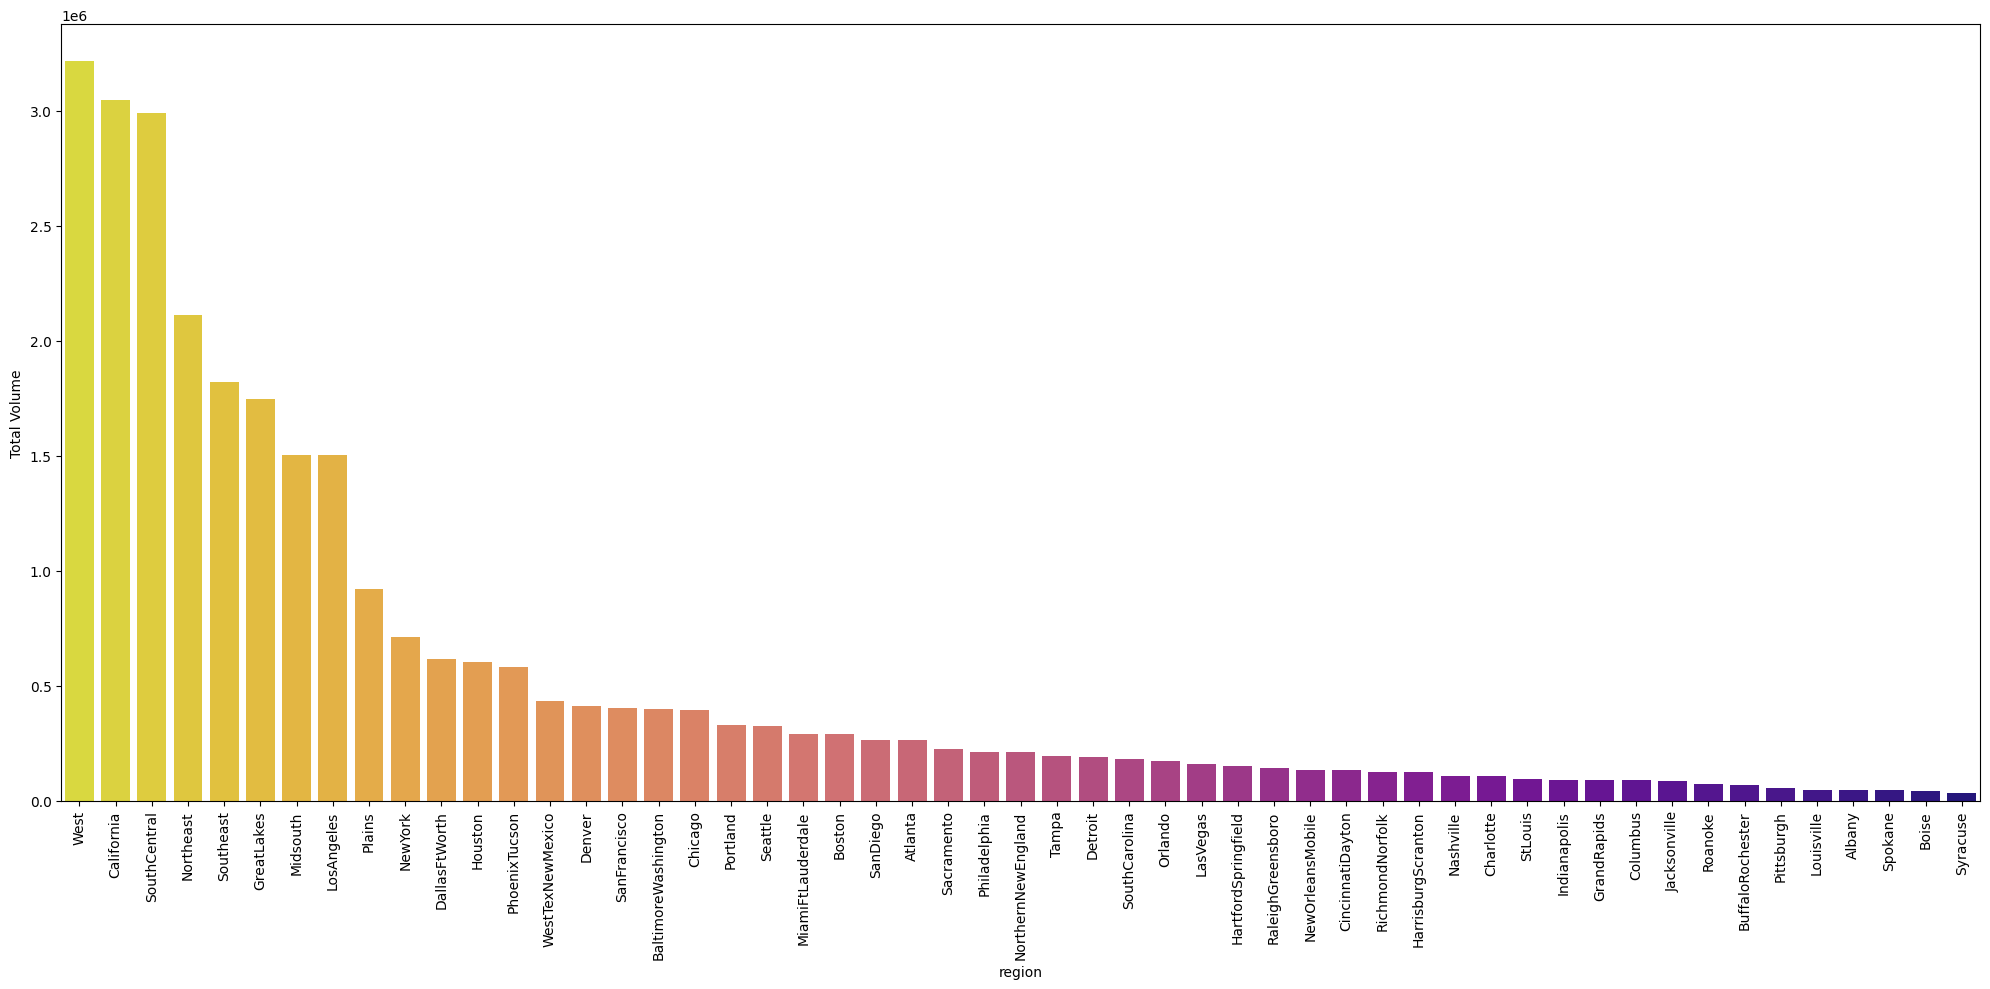

In [371]:
df_reg_avg = df.groupby(by='region')['Total Volume'].mean()
plt.figure(figsize=(20,10))
sns.barplot(data=df_reg_avg.drop('TotalUS').sort_values(ascending=False), palette='plasma_r')
plt.xticks(rotation=90)
plt.tight_layout()

<h3>West, California, SouthCentral, Northeast, Southeast have the highest total volume average avocado consumption</h3>

<H3>FEATURE ENGINEERING</H3>

<h3>---We will convert type categorical column into numerical column</h3>

In [372]:
df = pd.get_dummies(data=df, columns=['type',], dtype=int, drop_first=True)
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Month,Day,type_organic
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,Albany,12,27,0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,Albany,12,20,0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,Albany,12,13,0
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,Albany,12,6,0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,Albany,11,29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,WestTexNewMexico,2,4,1
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,WestTexNewMexico,1,28,1
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,WestTexNewMexico,1,21,1
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,WestTexNewMexico,1,14,1


In [373]:
df = pd.get_dummies(data=df, columns=['region'], dtype=int, drop_first=True)
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,...,0,0,0,0,0,0,0,0,0,0
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,...,0,0,0,0,0,0,0,0,0,0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,...,0,0,0,0,0,0,0,0,0,1
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,...,0,0,0,0,0,0,0,0,0,1
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,...,0,0,0,0,0,0,0,0,0,1
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,...,0,0,0,0,0,0,0,0,0,1


In [374]:
#We will drop Date column now as we already have day, month and year columns now

In [375]:
df.drop('Date', axis=1, inplace=True)

In [376]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,...,0,0,0,0,0,0,0,0,0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,...,0,0,0,0,0,0,0,0,0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,...,0,0,0,0,0,0,0,0,0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,...,0,0,0,0,0,0,0,0,0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,...,0,0,0,0,0,0,0,0,0,1
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,...,0,0,0,0,0,0,0,0,0,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,...,0,0,0,0,0,0,0,0,0,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,...,0,0,0,0,0,0,0,0,0,1


<h2>CORELATION BETWEEN VARIABLES AND HEATMAP</h2>

In [377]:
#Below is the old dataframe corelation and heatmap

In [321]:
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day,type_organic
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197,0.162409,0.027386,0.615845
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193,-0.024689,-0.009747,-0.232434
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353,-0.025803,-0.010159,-0.225819
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559,-0.022108,-0.012393,-0.232289
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531,-0.033424,-0.009009,-0.210027
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552,-0.022724,-0.004988,-0.217788
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915,-0.023126,-0.003870,-0.220535
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891,-0.020187,-0.008352,-0.193177
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033,-0.012969,0.000319,-0.175483
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000,-0.177050,0.004475,-0.000032


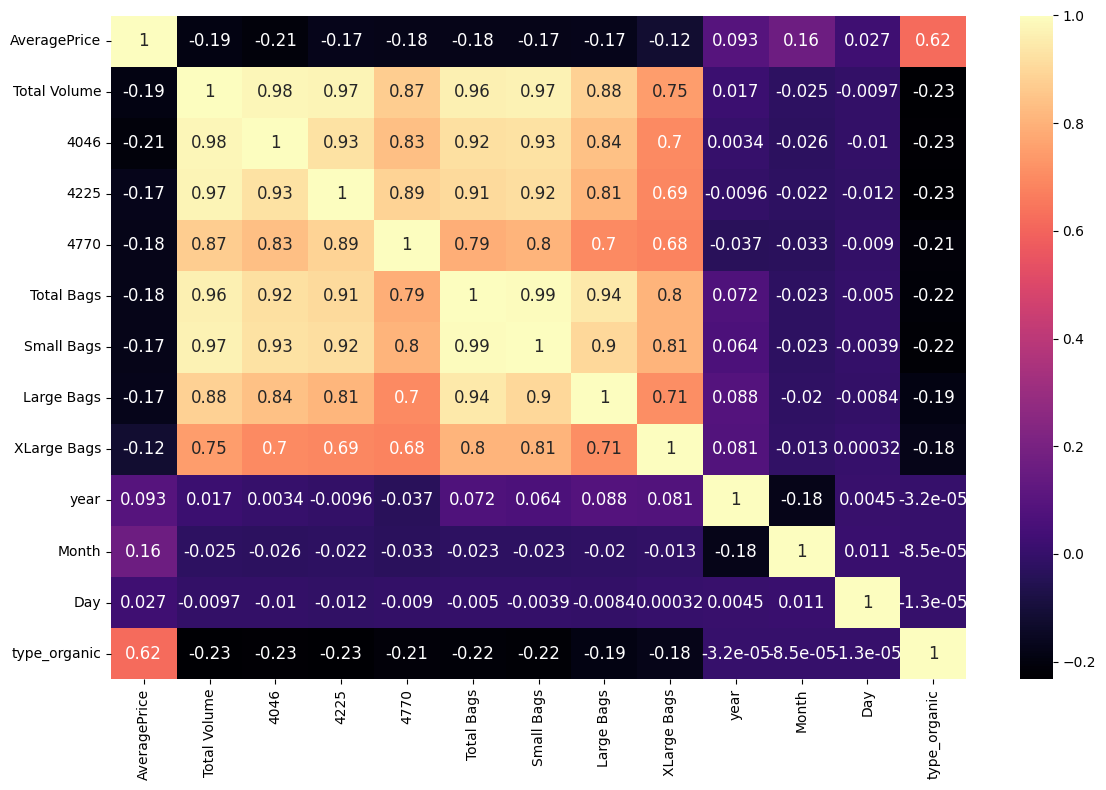

In [322]:
plt.figure(figsize=(12,8))
sns.heatmap(data=df.corr(), annot=True, cmap='magma',fmt='0.2g',annot_kws={'size':12})
plt.tight_layout()

In [323]:
#None of the columns have a very high co-relation with Average price column

<h2>DATA PREPROCESSING</h2>

<h3>Import train test split to split the data into training set and testing set</h3>

In [378]:
from sklearn.model_selection import train_test_split

In [379]:
X = df.drop('AveragePrice', axis=1)
y = df['AveragePrice']

In [380]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [381]:
X_train.shape
X_train

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
16391,5376.58,147.41,871.40,0.00,4357.77,4351.10,6.67,0.00,2017,11,...,0,0,0,0,0,0,0,0,0,0
4990,578610.94,155537.61,153030.46,21523.37,248519.50,144796.06,103723.44,0.00,2016,1,...,0,0,0,0,0,0,0,0,0,0
13653,6470.08,2026.07,2529.20,0.00,1914.81,1848.75,66.06,0.00,2016,11,...,0,0,0,0,0,0,0,0,0,0
2074,145648.40,78195.76,38763.75,134.25,28554.64,25981.67,2572.97,0.00,2015,2,...,0,0,0,0,0,0,0,0,0,0
12377,40535.05,162.25,38677.24,0.00,1695.56,1695.56,0.00,0.00,2016,6,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,12946.65,2398.15,10206.13,0.00,342.37,342.37,0.00,0.00,2015,6,...,0,0,0,0,0,0,0,0,0,0
11964,1193.06,26.72,346.19,0.00,820.15,820.15,0.00,0.00,2016,5,...,0,0,0,0,0,0,0,0,0,0
5390,83407.69,992.24,54950.48,769.07,26695.90,26695.90,0.00,0.00,2016,5,...,0,0,0,0,0,1,0,0,0,0
860,277578.88,42766.16,140403.76,2028.31,92380.65,87952.58,2821.41,1606.66,2015,6,...,0,0,0,0,0,0,0,0,0,0


In [382]:
X_test.shape
X_test

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
8604,218329.70,79239.58,26356.05,2998.74,109735.33,73393.34,34338.97,2003.02,2018,2,...,0,0,0,0,0,0,0,0,0,0
2608,391514.43,228324.13,72749.38,100.62,90340.30,44449.47,45890.83,0.00,2015,11,...,0,0,0,0,0,0,1,0,0,0
14581,3907.40,1147.09,39.51,0.00,2720.80,2717.47,3.33,0.00,2016,1,...,0,0,0,0,0,0,1,0,0,0
4254,267953.78,150786.30,27025.48,565.65,89576.35,74664.71,14911.64,0.00,2016,3,...,0,0,0,0,0,0,0,0,0,0
16588,8805.28,828.39,3.24,0.00,7973.65,7456.43,517.22,0.00,2017,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15956,77418.61,10912.94,21788.20,3.12,44714.35,41824.67,2889.68,0.00,2017,1,...,0,0,0,0,0,0,0,0,0,0
12471,7223.46,629.11,4017.95,0.00,2576.40,1129.77,1446.63,0.00,2016,8,...,0,0,0,0,0,0,0,0,0,0
4574,1276128.92,868817.82,252752.29,12047.67,142511.14,91807.54,50703.60,0.00,2016,1,...,0,0,0,0,0,0,0,0,0,0
16359,20003.65,14.31,370.78,0.00,19618.56,19618.56,0.00,0.00,2017,6,...,0,0,0,0,0,0,0,0,0,0


In [383]:
y_train

16391    1.88
4990     0.81
13653    2.01
2074     1.02
12377    1.53
         ... 
11284    1.55
11964    1.55
5390     1.31
860      1.13
15795    1.35
Name: AveragePrice, Length: 14599, dtype: float64

In [384]:
y_test

8604     0.82
2608     0.97
14581    1.44
4254     0.97
16588    1.45
         ... 
15956    1.27
12471    1.67
4574     0.59
16359    1.92
16249    1.79
Name: AveragePrice, Length: 3650, dtype: float64

<h2>SCALING THE DATA USING STANDARD SCALER</h2>

In [385]:
from sklearn.preprocessing import StandardScaler

In [386]:
scaler = StandardScaler()

In [387]:
X_train=pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_train

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,-0.247683,-0.235928,-0.245519,-0.211662,-0.241649,-0.241658,-0.224957,-0.177018,0.905234,1.360639,...,-0.137528,-0.139327,-0.138302,-0.13492,-0.137528,-0.136751,-0.13623,-0.137528,-0.138044,-0.138815
1,-0.079312,-0.110923,-0.118244,-0.011670,0.010839,-0.049399,0.206852,-0.177018,-0.158217,-1.471649,...,-0.137528,-0.139327,-0.138302,-0.13492,-0.137528,-0.136751,-0.13623,-0.137528,-0.138044,-0.138815
2,-0.247362,-0.234417,-0.244132,-0.211662,-0.244176,-0.245084,-0.224710,-0.177018,-0.158217,1.360639,...,-0.137528,-0.139327,-0.138302,-0.13492,-0.137528,-0.136751,-0.13623,-0.137528,-0.138044,-0.138815
3,-0.206482,-0.173141,-0.213823,-0.210415,-0.216627,-0.212047,-0.214273,-0.177018,-1.221669,-1.188420,...,-0.137528,-0.139327,-0.138302,-0.13492,-0.137528,-0.136751,-0.13623,-0.137528,-0.138044,-0.138815
4,-0.237356,-0.235916,-0.213896,-0.211662,-0.244402,-0.245293,-0.224985,-0.177018,-0.158217,-0.055505,...,-0.137528,-0.139327,-0.138302,-0.13492,-0.137528,-0.136751,-0.13623,-0.137528,-0.138044,-0.138815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14594,-0.245460,-0.234117,-0.237710,-0.211662,-0.245802,-0.247146,-0.224985,-0.177018,-1.221669,-0.055505,...,-0.137528,-0.139327,-0.138302,-0.13492,-0.137528,-0.136751,-0.13623,-0.137528,-0.138044,-0.138815
14595,-0.248912,-0.236025,-0.245958,-0.211662,-0.245308,-0.246492,-0.224985,-0.177018,-0.158217,-0.338734,...,-0.137528,-0.139327,-0.138302,-0.13492,-0.137528,-0.136751,-0.13623,-0.137528,-0.138044,-0.138815
14596,-0.224764,-0.235248,-0.200284,-0.204516,-0.218549,-0.211070,-0.224985,-0.177018,-0.158217,-0.338734,...,-0.137528,-0.139327,-0.138302,-0.13492,-0.137528,7.312584,-0.13623,-0.137528,-0.138044,-0.138815
14597,-0.167732,-0.201643,-0.128806,-0.192815,-0.150624,-0.127213,-0.213238,-0.085766,-1.221669,-0.055505,...,-0.137528,-0.139327,-0.138302,-0.13492,-0.137528,-0.136751,-0.13623,-0.137528,-0.138044,-0.138815


In [388]:
X_test=pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
X_test

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,-0.185134,-0.172302,-0.224202,-0.183798,-0.132678,-0.147144,-0.082020,-0.063254,1.968686,-1.188420,...,-0.137528,-0.139327,-0.138302,-0.13492,-0.137528,-0.136751,-0.136230,-0.137528,-0.138044,-0.138815
1,-0.134266,-0.052370,-0.185396,-0.210727,-0.152734,-0.186766,-0.033925,-0.177018,-1.221669,1.360639,...,-0.137528,-0.139327,-0.138302,-0.13492,-0.137528,-0.136751,7.340535,-0.137528,-0.138044,-0.138815
2,-0.248115,-0.235124,-0.246214,-0.211662,-0.243342,-0.243894,-0.224971,-0.177018,-0.158217,-1.471649,...,-0.137528,-0.139327,-0.138302,-0.13492,-0.137528,-0.136751,7.340535,-0.137528,-0.138044,-0.138815
3,-0.170559,-0.114746,-0.223642,-0.206406,-0.153524,-0.145404,-0.162902,-0.177018,-0.158217,-0.905191,...,-0.137528,-0.139327,-0.138302,-0.13492,-0.137528,-0.136751,-0.136230,-0.137528,-0.138044,-0.138815
4,-0.246676,-0.235380,-0.246245,-0.211662,-0.237910,-0.237407,-0.222831,-0.177018,0.905234,-1.188420,...,-0.137528,-0.139327,-0.138302,-0.13492,-0.137528,-0.136751,-0.136230,-0.137528,-0.138044,-0.138815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3645,-0.226523,-0.227268,-0.228023,-0.211633,-0.199916,-0.190359,-0.212954,-0.177018,0.905234,-1.471649,...,-0.137528,-0.139327,-0.138302,-0.13492,-0.137528,-0.136751,-0.136230,-0.137528,-0.138044,-0.138815
3646,-0.247141,-0.235540,-0.242887,-0.211662,-0.243491,-0.246068,-0.218962,-0.177018,-0.158217,0.510953,...,-0.137528,-0.139327,-0.138302,-0.13492,-0.137528,-0.136751,-0.136230,-0.137528,-0.138044,-0.138815
3647,0.125563,0.462880,-0.034832,-0.099717,-0.098784,-0.121936,-0.013888,-0.177018,-0.158217,-1.471649,...,-0.137528,-0.139327,-0.138302,-0.13492,-0.137528,-0.136751,-0.136230,-0.137528,-0.138044,-0.138815
3648,-0.243387,-0.236035,-0.245937,-0.211662,-0.225868,-0.220758,-0.224985,-0.177018,0.905234,-0.055505,...,-0.137528,-0.139327,-0.138302,-0.13492,-0.137528,-0.136751,-0.136230,-0.137528,-0.138044,-0.138815


<H2>MACHINE LEARNING MODEL BUILDING AND TESTING</H2>

<h3>We will first testing with Linear Regression as we have to predict the price of avocado</h3>

In [389]:
from sklearn.linear_model import LinearRegression

In [390]:
linear_regression = LinearRegression()

In [391]:
linear_regression.fit(X_train, y_train)

LinearRegression()

In [392]:
lr_pred = linear_regression.predict(X_test)

In [393]:
lr_pred

array([1.016857  , 1.1893518 , 1.55631507, ..., 0.85938303, 1.77088555,
       2.04561044])

In [394]:
y_test

8604     0.82
2608     0.97
14581    1.44
4254     0.97
16588    1.45
         ... 
15956    1.27
12471    1.67
4574     0.59
16359    1.92
16249    1.79
Name: AveragePrice, Length: 3650, dtype: float64

In [395]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [396]:
print(f'The mean absolute error is {mean_absolute_error(y_test, lr_pred)}')
print()
print(f'The mean sqaured error is {mean_squared_error(y_test, lr_pred)}')
print()
print(f'The root mean sqaured error is {np.sqrt(mean_squared_error(y_test, lr_pred))}')

The mean absolute error is 0.194647799334734

The mean sqaured error is 0.06622078348083264

The root mean sqaured error is 0.2573339920819491


In [397]:
print(f'R2 SCORE IS {r2_score(y_test, lr_pred)}')

R2 SCORE IS 0.5878436466218433


<Axes: xlabel='AveragePrice'>

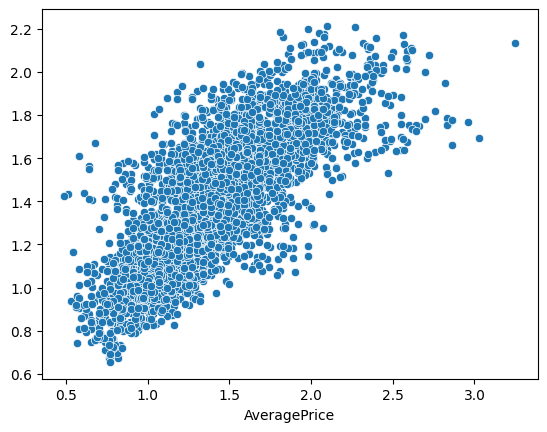

In [398]:
sns.scatterplot(x=y_test, y=lr_pred)

In [399]:
#Now lets check training accuracy 

In [400]:
lr_train_pred = linear_regression.predict(X_train)
lr_train_pred

array([1.89428648, 1.03609408, 1.57291662, ..., 1.22285459, 1.21236851,
       1.50801182])

In [401]:
print(f'The mean absolute error is {mean_absolute_error(y_train, lr_train_pred)}')
print()
print(f'The mean sqaured error is {mean_squared_error(y_train, lr_train_pred)}')
print()
print(f'The root mean sqaured error is {np.sqrt(mean_squared_error(y_train, lr_train_pred))}')

The mean absolute error is 0.19441496555613527

The mean sqaured error is 0.06635909737156383

The root mean sqaured error is 0.2576025958168198


In [402]:
y_train

16391    1.88
4990     0.81
13653    2.01
2074     1.02
12377    1.53
         ... 
11284    1.55
11964    1.55
5390     1.31
860      1.13
15795    1.35
Name: AveragePrice, Length: 14599, dtype: float64

In [403]:
print(f'TRAINING R2 SCORE IS {r2_score(y_train, lr_train_pred)}')

TRAINING R2 SCORE IS 0.5916385940716291


<h2>Our linear regression training accuracy and testing accuracy is almost same which is a really good thing</h2>

In [404]:
#Now lets check cross val score

In [405]:
from sklearn.model_selection import cross_val_score

In [409]:
lr_cross_val_score = cross_val_score(linear_regression, X_train,y_train, cv=5, scoring='r2')

In [410]:
lr_cross_val_score

array([0.58960097, 0.60361575, 0.59660502, 0.58031508, 0.56706795])

<h3>Now lets try Decision Tree Regressor algorithm</h3>

In [411]:
from sklearn.tree import DecisionTreeRegressor

In [412]:
dtr = DecisionTreeRegressor()

In [413]:
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [414]:
dtr_pred = dtr.predict(X_test)
dtr_pred

array([0.81, 0.84, 1.43, ..., 0.58, 1.93, 2.02])

In [415]:
print(f'The mean absolute error is {mean_absolute_error(y_test, dtr_pred)}')
print()
print(f'The mean sqaured error is {mean_squared_error(y_test, dtr_pred)}')
print()
print(f'The root mean sqaured error is {np.sqrt(mean_squared_error(y_test, dtr_pred))}')

The mean absolute error is 0.12185205479452055

The mean sqaured error is 0.033928712328767124

The root mean sqaured error is 0.18419748187412097


In [416]:
print(f'R2 SCORE IS {r2_score(y_test, dtr_pred)}')

R2 SCORE IS 0.7888286182496049


<Axes: xlabel='AveragePrice'>

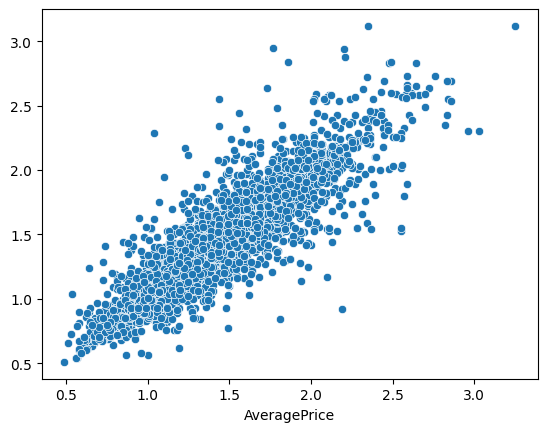

In [417]:
sns.scatterplot(x=y_test, y=dtr_pred)

In [418]:
#Our model has improved a lot with the r2 score also increasing and predicting a near perfect price

In [420]:
dtr_train_pred = dtr.predict(X_train)
dtr_train_pred

array([1.88, 0.81, 2.01, ..., 1.31, 1.13, 1.35])

In [421]:
y_train

16391    1.88
4990     0.81
13653    2.01
2074     1.02
12377    1.53
         ... 
11284    1.55
11964    1.55
5390     1.31
860      1.13
15795    1.35
Name: AveragePrice, Length: 14599, dtype: float64

In [422]:
print(f'The mean absolute error is {mean_absolute_error(y_train, dtr_train_pred)}')
print()
print(f'The mean sqaured error is {mean_squared_error(y_train, dtr_train_pred)}')
print()
print(f'The root mean sqaured error is {np.sqrt(mean_squared_error(y_train, dtr_train_pred))}')

The mean absolute error is 7.300596641140834e-19

The mean sqaured error is 1.2157935726743453e-34

The root mean sqaured error is 1.1026302973682273e-17


In [423]:
print('dtr training r2 score is ', r2_score(y_train, dtr_train_pred))

dtr training r2 score is  1.0


In [424]:
#WOW WE JUST ALMOST ACHIEVED A PERFECT R2 TRAINING SCORE WHICH MEANS OUR MODEL HAS LEARNT VERY WELL ON TRAINING
# DATA AND IT IS ALSO PERFORMING GOOD ON TESTING DATA

In [425]:
#CROSS VAL SCORE

In [426]:
dt_cross_val_score = cross_val_score(dtr, X_train,y_train, cv=5, scoring='r2')

In [427]:
dt_cross_val_score

array([0.76911042, 0.78656644, 0.7932772 , 0.75551105, 0.74539125])

In [428]:
dt_cross_val_score = cross_val_score(dtr, X_test, y_test, cv=5, scoring='r2')

In [429]:
dt_cross_val_score

array([0.61842137, 0.56313169, 0.49980349, 0.56863518, 0.63116167])

In [430]:
#Our R2 SCORE IS NOT INCREASING MUCH USING CROSS VALIDATION AS WELL

<h2>RANDOM FOREST REGRESSOR ALGORITHM</h2>

In [431]:
from sklearn.ensemble import RandomForestRegressor

In [432]:
rfr = RandomForestRegressor()

In [433]:
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [434]:
rfr_pred = rfr.predict(X_test)
rfr_pred

array([0.9506, 0.972 , 1.4081, ..., 0.5995, 1.7043, 2.1144])

In [435]:
print(f'The mean absolute error is {mean_absolute_error(y_test, rfr_pred)}')
print()
print(f'The mean sqaured error is {mean_squared_error(y_test, rfr_pred)}')
print()
print(f'The root mean sqaured error is {np.sqrt(mean_squared_error(y_test, rfr_pred))}')

The mean absolute error is 0.0878185205479452

The mean sqaured error is 0.015510046509589037

The root mean sqaured error is 0.12453933719748567


In [436]:
y_test

8604     0.82
2608     0.97
14581    1.44
4254     0.97
16588    1.45
         ... 
15956    1.27
12471    1.67
4574     0.59
16359    1.92
16249    1.79
Name: AveragePrice, Length: 3650, dtype: float64

In [437]:
print('RANDOM FOREST R2 SCORE IS ', r2_score(y_test, rfr_pred))

RANDOM FOREST R2 SCORE IS  0.9034658928194631


In [438]:
rfr_train_pred = dtr.predict(X_train)
rfr_train_pred

array([1.88, 0.81, 2.01, ..., 1.31, 1.13, 1.35])

In [439]:
print(f'The mean absolute error is {mean_absolute_error(y_train, rfr_train_pred)}')
print()
print(f'The mean sqaured error is {mean_squared_error(y_train, rfr_train_pred)}')
print()
print(f'The root mean sqaured error is {np.sqrt(mean_squared_error(y_train, rfr_train_pred))}')

The mean absolute error is 7.300596641140834e-19

The mean sqaured error is 1.2157935726743453e-34

The root mean sqaured error is 1.1026302973682273e-17


In [440]:
print('Random Forest training r2 score is ', r2_score(y_train, rfr_train_pred))

Random Forest training r2 score is  1.0


In [441]:
#Our r2 training score is again perfect

In [442]:
#Testing r2 score is 0.90 which is mind blowing improvement over linear regression

In [443]:
rfr_cross_val_score = cross_val_score(dtr, X_train,y_train, cv=5, scoring='r2')
rfr_cross_val_score

array([0.77811005, 0.77712516, 0.79597684, 0.77057672, 0.75239158])

In [444]:
rfr_cross_val_score = cross_val_score(dtr, X_test,y_test, cv=5, scoring='r2')
rfr_cross_val_score

array([0.61196728, 0.57528256, 0.48361275, 0.56371975, 0.62177861])

In [445]:
#We will not use cross val scores as it degrades the perfromance

<h2>We will choose Random Forest Regressor algorithm as it give highest r2 score and error is also very low</h2>

<h3>HYPERPARAMTER TUNING </h3>

In [461]:
from sklearn.model_selection import RandomizedSearchCV

In [462]:
param_grid = {
    'n_estimators': [50, 100, 200,300],
    'max_depth': [30,40,],
    'min_samples_split': [2,3,4],
    'min_samples_leaf': [1, 2, 4],
}

In [463]:
randomized_search = RandomizedSearchCV(RandomForestRegressor(), param_distributions=param_grid, scoring='r2', cv=5, n_jobs=-1, verbose=4)

In [464]:
randomized_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [30, 40],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 3, 4],
                                        'n_estimators': [50, 100, 200, 300]},
                   scoring='r2', verbose=4)

In [465]:
randomized_search.best_score_

0.8927008158240033

In [466]:
randomized_search.best_params_

{'n_estimators': 300,
 'min_samples_split': 3,
 'min_samples_leaf': 1,
 'max_depth': 40}

In [467]:
rfr1 = RandomForestRegressor(n_estimators=500, min_samples_leaf=1, min_samples_split=5, max_depth=60)

In [468]:
rfr1.fit(X_train, y_train)

RandomForestRegressor(max_depth=60, min_samples_split=5, n_estimators=500)

In [469]:
rfr1_pred = rfr1.predict(X_test)

In [470]:
rfr1_pred

array([0.95041169, 0.98877008, 1.406758  , ..., 0.59843785, 1.70571336,
       2.10510351])

In [473]:
print(f'The mean absolute error is {mean_absolute_error(y_test, rfr1_pred)}')
print()
print(f'The mean sqaured error is {mean_squared_error(y_test, rfr1_pred)}')
print()
print(f'The root mean sqaured error is {np.sqrt(mean_squared_error(y_test, rfr1_pred))}')

The mean absolute error is 0.0881124076407443

The mean sqaured error is 0.01568930479441431

The root mean sqaured error is 0.125256955074017


In [474]:
print('R2 SCORE IS ', r2_score(y_test, rfr1_pred))

R2 SCORE IS  0.9023501941354118


In [475]:
#We have understood that despite hyperparamter tuning the results didnot improve at all

<h2>We will now export the Random Forest model which we created earlier</h2>

In [476]:
import pickle

In [477]:
with open('Avocado_Price_Prediction.pkl', 'wb') as file:
    pickle.dump(rfr,file)

In [478]:
#The Random Forest Regressor model is saved in a pickle file

<h2>DOCUMENTATION</h2>

<h4>We have trained and tested various Machine Learning models to predict the Avacado price
and the best performing model is the Random Forest Regressor. 
</h4>
    
<h4>The R2 score of Random Forest Algorithm is 0.90 which is superb.</h4>

<h4>Some other metrics includes :</h4>
<h4>The mean absolute error is 0.0878185205479452</h4>
<h4>The mean sqaured error is 0.015510046509589037</h4>
<h4>The root mean sqaured error is 0.12453933719748567</h4>
<h4>Some other useful information is the model doesnt overfit the data.</h4>
<h4>Thank You
</h4>